In [5]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from prophet import Prophet

In [6]:
df = pd.read_csv("..\\datasets\\nyc_taxi_trip_duration.csv", usecols=["dropoff_datetime"], engine='pyarrow')
df["dropoff_datetime"] = df["dropoff_datetime"].dt.round('D')
df["trip_count"] = 1
df = df.groupby(by=['dropoff_datetime']).sum().sort_index().reset_index()

In [10]:
def run_prophet(df, width=0.4, show_model=False):
    df = df.copy()
    df.rename(columns ={'dropoff_datetime': 'ds', 'trip_count': 'y'}, inplace=True)
    df = df.groupby(by=['ds']).sum().sort_index().reset_index()
    m = Prophet(weekly_seasonality=True, interval_width=0.45)
    m.fit(df)
    pred = m.predict(df)
    if show_model:
        m.plot(pred)
    return df[(df['y'] < pred['yhat_lower']) | (df['y'] > pred['yhat_upper'])].rename(columns={'y': 'trips_count', 'ds': 'day'})

00:13:13 - cmdstanpy - INFO - Chain [1] start processing
00:13:13 - cmdstanpy - INFO - Chain [1] done processing


<Axes: xlabel='dropoff_datetime', ylabel='trips_count'>

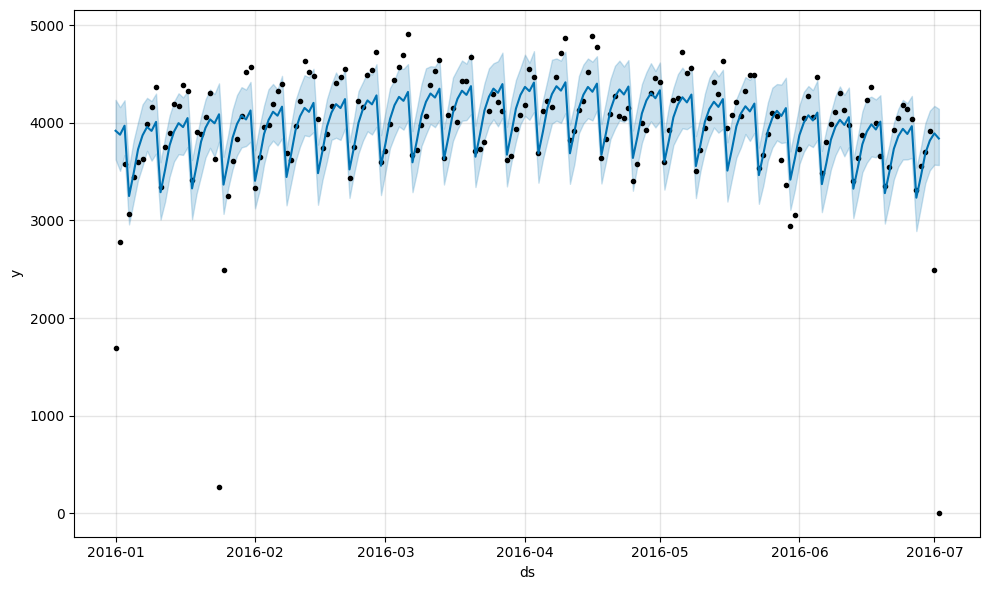

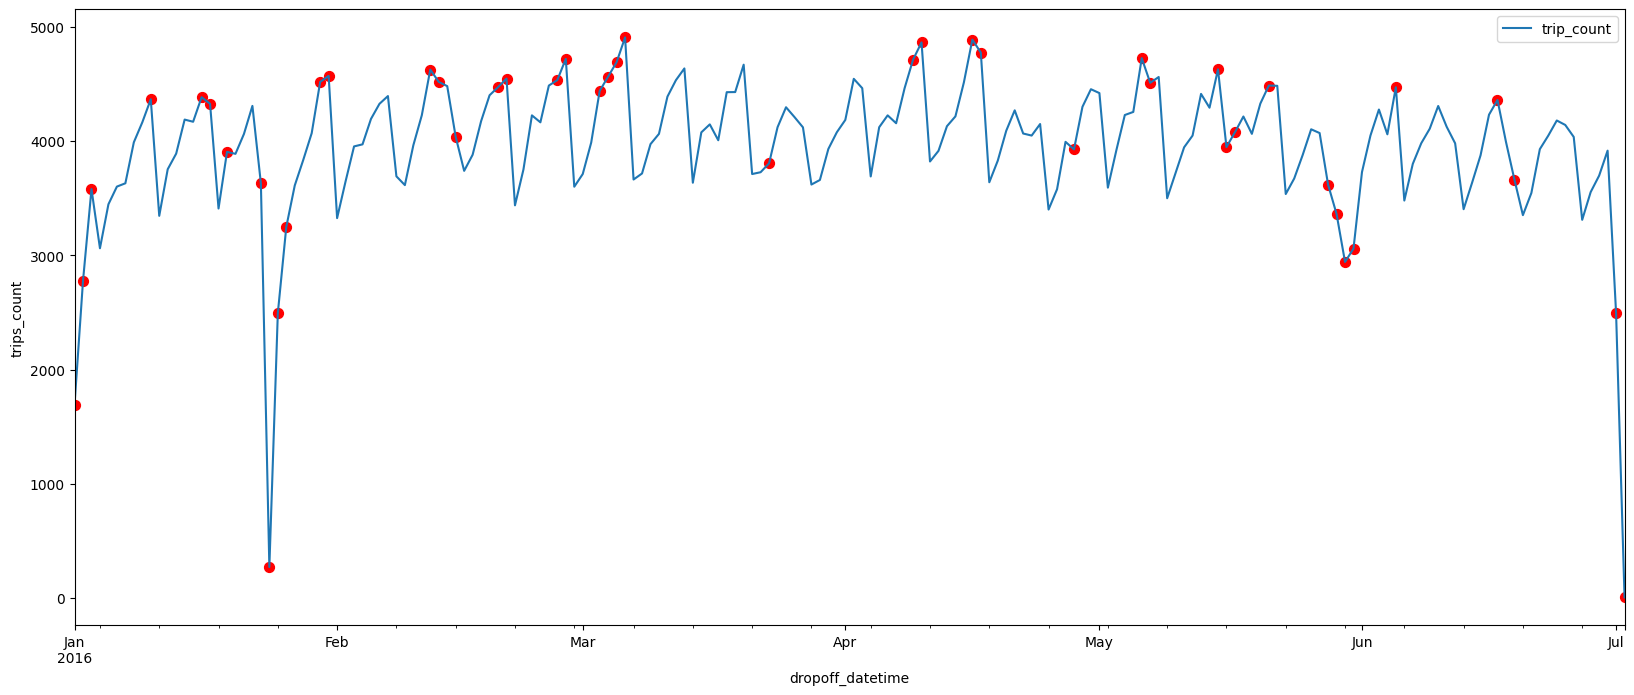

In [13]:
ax = run_prophet(df, show_model=True).plot.scatter('day', 'trips_count', c='r', s=50, figsize=(20, 8))
df.plot('dropoff_datetime', ax=ax)